[06/19/23 20:12:02] INFO     Saving cached data to /Users/ethanrichards/soccerdata/data/FBref         ]8;id=39907;file:///Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=953670;file:///Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/soccerdata/_common.py#89\89]8;;\

[06/19/23 20:12:03] WARNING  No artists with labels found to put in legend.  Note that artists whose ]8;id=924947;file:///Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/legend.py\legend.py]8;;\:]8;id=776951;file:///Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/legend.py#1330\1330]8;;\
                             label start with an underscore are ignored when legend() is called with               
                             no argument.                                                                          

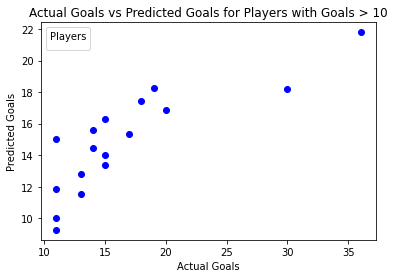

                    INFO     Saving cached data to /Users/ethanrichards/soccerdata/data/FBref         ]8;id=930684;file:///Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=747014;file:///Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/soccerdata/_common.py#89\89]8;;\

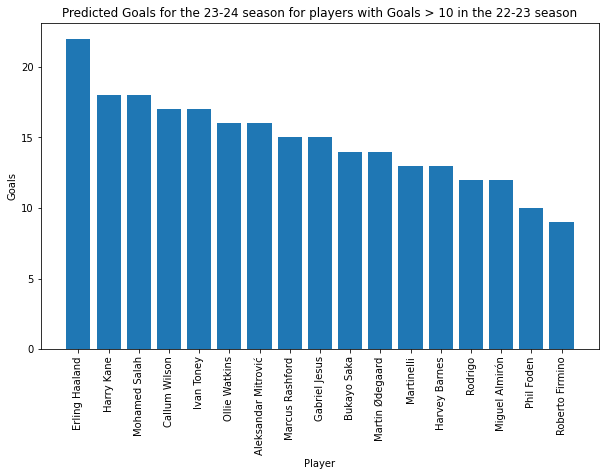

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import soccerdata as sd
import matplotlib.pyplot as plt
%matplotlib inline

# Load in FBref players via soccerdata web scraper
fbref = sd.FBref(leagues="ENG-Premier League", seasons=2022)
player_season_stats = fbref.read_player_season_stats(stat_type="standard")
player_season_stats = player_season_stats.reset_index(level=['league','season', 'team', 'player'])

# Convert columns to numeric data types
player_season_stats[('Performance', 'Gls')] = pd.to_numeric(player_season_stats[('Performance', 'Gls')])
player_season_stats[('Expected', 'xG')] = pd.to_numeric(player_season_stats[('Expected', 'xG')])

# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

player_season_stats = player_season_stats[player_season_stats[('Performance', 'Gls')] > 10]
#print(player_season_stats)

# TODO: ('team', '') - find highest xA on team and then add that as a contributing predictor?
X = player_season_stats[[('Per 90 Minutes', 'xG'), ('Playing Time', 'Starts')]] # ('Performance', 'Gls')) left out
y = player_season_stats[[('Performance', 'Gls')]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

# create model
lr = LinearRegression(fit_intercept=False)

# train model
lr.fit(X_train, y_train)
predicted_goals = lr.predict(X)

plt.scatter(player_season_stats[('Performance', 'Gls')], predicted_goals, color='blue')

#label it
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('Actual Goals vs Predicted Goals for Players with Goals > 10')
plt.legend(title='Players')
plt.show()

# test model
#y_hat_train = lr.predict(X_train)
#y_pred_test = lr.predict(X_test)

# Histogram For Comparison
fbref = sd.FBref(leagues="ENG-Premier League", seasons=2022)
player_season_stats = fbref.read_player_season_stats(stat_type="standard")
player_season_stats.head()

# converting to integers
player_season_stats[('Performance', 'Gls')] = player_season_stats[('Performance', 'Gls')].astype(int)

# Filter players with goals above 10
filtered_players = player_season_stats[player_season_stats[('Performance', 'Gls')] > 10]

# Transfer this data to a dataframe to sort more easily
predictions = {}
for i in range(0, len(filtered_players.index.get_level_values('player'))):
    predictions.update({ filtered_players.index.get_level_values('player')[i] : round(predicted_goals[i][0]) })

predictions = pd.DataFrame(predictions.items(), columns=['player', 'Predicted Goals'])

# Sort the data
sorted_predictions = predictions.sort_values(by='Predicted Goals', ascending=False)
player_names = sorted_predictions['player']
goals = sorted_predictions['Predicted Goals']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(player_names, goals)
plt.xlabel('Player')
plt.ylabel('Goals')
plt.title('Predicted Goals for the 23-24 season for players with Goals > 10 in the 22-23 season')
plt.xticks(rotation=90)
plt.show()